21.03.19 ML_DL 군집화

# 군집화

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = []
for i in range(50):
    data.append([random.randint(40,70), random.randint(140,180)])
    data.append([random.randint(60,90), random.randint(170,200)])

In [3]:
# 여자 데이터
for female in data[0:100:2]:
    print(female, end=" ")

print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~") 

#남자 데이터
for male in data[1:100:2]:
    print(male, end=" ")

[56, 163] [48, 159] [68, 170] [69, 169] [52, 140] [69, 161] [49, 170] [70, 174] [57, 148] [60, 157] [70, 141] [54, 159] [44, 169] [61, 155] [60, 153] [48, 149] [64, 163] [43, 155] [46, 180] [68, 149] [62, 173] [60, 174] [49, 167] [69, 151] [58, 159] [49, 161] [53, 142] [50, 151] [53, 149] [56, 177] [63, 176] [53, 174] [70, 171] [44, 157] [40, 163] [41, 168] [61, 165] [57, 174] [64, 160] [49, 144] [47, 179] [47, 178] [44, 145] [53, 159] [61, 159] [68, 169] [54, 149] [64, 149] [57, 176] [62, 154] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[81, 188] [83, 186] [86, 185] [80, 182] [82, 187] [70, 194] [90, 197] [65, 177] [90, 195] [71, 200] [82, 173] [81, 182] [69, 182] [90, 172] [83, 173] [70, 178] [71, 184] [64, 172] [90, 186] [70, 176] [79, 197] [63, 196] [67, 188] [67, 190] [81, 172] [88, 191] [76, 185] [81, 188] [82, 192] [80, 184] [66, 174] [62, 187] [75, 172] [67, 185] [75, 184] [76, 187] [65, 189] [66, 181] [60, 176] [75, 178] [88, 19

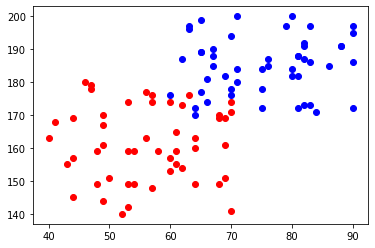

In [4]:
# 여자 몸무게
[d[0] for d in data[0:100:2]]
# 여자 키
[d[1] for d in data[0:100:2]]

# 남자 몸무게
[d[0] for d in data[1:100:2]]
# 남자 키
[d[1] for d in data[1:100:2]]

plt.plot([d[0] for d in data[0:100:2]], 
         [d[1] for d in data[0:100:2]], "o", color='r')
plt.plot([d[0] for d in data[1:100:2]], 
         [d[1] for d in data[1:100:2]], "o", color='b')

In [5]:
# 초기 랜덤 지점 2개
random_points = [[random.randint(40,90), random.randint(140,200)],
                [random.randint(40,90), random.randint(140,200)]]
print('초기 랜덤 기준점 :', random_points)

초기 랜덤 기준점 : [[79, 173], [54, 158]]


In [6]:
# 기준점 1
print(random_points[0][0], random_points[0][1], end='/')
# 기준점 2
print(random_points[1][0], random_points[1][1])

79 173/54 158


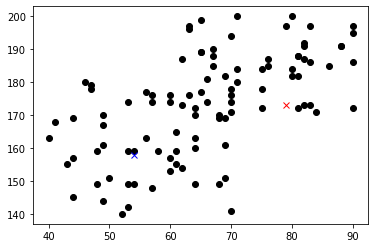

In [7]:
for x in data:
    plt.plot(x[0], x[1], 'o', color='k')
plt.plot(random_points[0][0], 
         random_points[0][1], 'x', color='r') # 기준점1
plt.plot(random_points[1][0], 
         random_points[1][1], 'x', color='b') # 기준점2    

In [8]:
# 두 영역으로 나눌 빈 리스트 생성
group1 = []
group2 = []

In [9]:
# 영역을 나누기 위해 두 점 사이의 거리를 구하는 함수 [0,0] ~ [3,4]
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [10]:
a = [0,0]; b=[3,4]
dist(a, b)

5.0

In [11]:
for d in data:
    if dist(random_points[0], d) < dist(random_points[1],d): 
        group1.append(d) # 빨간 x랑 더 가까운 그룹 
    else:
        group2.append(d) # 파란 x랑 더 가까운 그룹

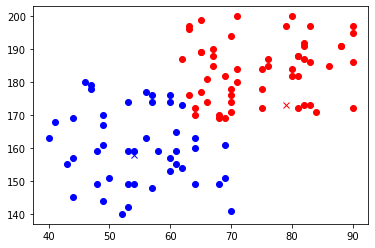

In [12]:
# 새로운 영역과 랜덤점 그래프
for d in group1:
    plt.plot(d[0], d[1], 'o', color='r')
for d in group2:
    plt.plot(d[0], d[1],'o', color='b')
plt.plot(random_points[0][0], random_points[0][1], 'x', color='r') # 기준점1
plt.plot(random_points[1][0], random_points[1][1], 'x', color='b') # 기준점2

In [13]:
# 기준점 이동
sumX = 0; sumY = 0
for g in group1:
    sumX += g[0] # x축값들 누적
    sumY += g[1] # y축값들 누적
# 새로운 기준점
new_points = []
new_points.append([sumX/len(group1), sumY/len(group1)])
sumX = 0 ; sumY = 0;
for g in group2:
    sumX += g[0]
    sumY += g[1]
new_points.append([sumX/len(group2), sumY/len(group2)])
print(random_points)
print(new_points)

[[79, 173], [54, 158]]
[[74.76363636363637, 183.6909090909091], [54.8, 160.0888888888889]]


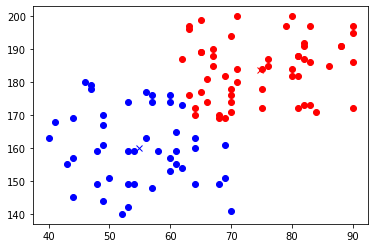

In [14]:
# 새로운 영역과 랜덤점 그래프
for d in group1:
    plt.plot(d[0], d[1], 'o', color='r')
for d in group2:
    plt.plot(d[0], d[1],'o', color='b')
plt.plot(new_points[0][0], new_points[0][1], 'x', color='r') # 기준점1
plt.plot(new_points[1][0], new_points[1][1], 'x', color='b') # 기준점2

In [15]:
group1 = []
group2 = []
for d in data:
    if dist(new_points[0], d) < dist(new_points[1],d): 
        group1.append(d) # 빨간 x랑 더 가까운 그룹 
    else:
        group2.append(d) # 파란 x랑 더 가까운 그룹

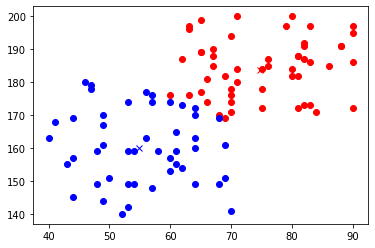

In [16]:
# 새로운 영역과 랜덤점 그래프
for d in group1:
    plt.plot(d[0], d[1], 'o', color='r')
for d in group2:
    plt.plot(d[0], d[1],'o', color='b')
plt.plot(new_points[0][0], new_points[0][1], 'x', color='r') # 기준점1
plt.plot(new_points[1][0], new_points[1][1], 'x', color='b') # 기준점2

전체코드

In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt

# 영역을 나누기 위해 두 점 사이의 거리를 구하는 함수 [0,0] ~ [3,4]
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

data = []
for i in range(50):
    data.append([random.randint(40,70), random.randint(140,180)])
    data.append([random.randint(60,90), random.randint(170,200)])
new_points = [[random.randint(40,90), random.randint(140,200)],
              [random.randint(40,90), random.randint(140,200)]]
print('초기기준점 :',new_points)
for i in range(1,11):
    group1 = []
    group2 = []
    for d in data:
        if dist(new_points[0], d) < dist(new_points[1], d):
            group1.append(d)
        else:
            group2.append(d)
    # group1과 group2의 중간지점을 새로운 기준점
    sumX = 0; sumY = 0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    new_points = []
    new_points.append([sumX/len(group1), sumY/len(group1)])
    sumX = 0; sumY = 0
    for g in group2:
        sumX += g[0]
        sumY += g[1]
    new_points.append([sumX/len(group2), sumY/len(group2)])
    print(i,'번째 기준 :', new_points)

초기기준점 : [[60, 151], [72, 162]]
1 번째 기준 : [[52.588235294117645, 153.38235294117646], [70.31818181818181, 182.45454545454547]]
2 번째 기준 : [[53.648648648648646, 154.05405405405406], [70.53968253968254, 183.44444444444446]]
3 번째 기준 : [[53.648648648648646, 154.05405405405406], [70.53968253968254, 183.44444444444446]]
4 번째 기준 : [[53.648648648648646, 154.05405405405406], [70.53968253968254, 183.44444444444446]]
5 번째 기준 : [[53.648648648648646, 154.05405405405406], [70.53968253968254, 183.44444444444446]]
6 번째 기준 : [[53.648648648648646, 154.05405405405406], [70.53968253968254, 183.44444444444446]]
7 번째 기준 : [[53.648648648648646, 154.05405405405406], [70.53968253968254, 183.44444444444446]]
8 번째 기준 : [[53.648648648648646, 154.05405405405406], [70.53968253968254, 183.44444444444446]]
9 번째 기준 : [[53.648648648648646, 154.05405405405406], [70.53968253968254, 183.44444444444446]]
10 번째 기준 : [[53.648648648648646, 154.05405405405406], [70.53968253968254, 183.44444444444446]]


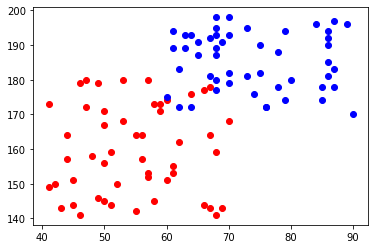

In [18]:
# 여자 몸무게 
[d[0] for d in data[0:100:2] ]
# 여자 키
[d[1] for d in data[0:100:2] ]
# 남자 몸무게 
[d[0] for d in data[1:100:2] ]
# 남자 키
[d[1] for d in data[1:100:2] ]
plt.plot([d[0] for d in data[0:100:2] ], [d[1] for d in data[0:100:2] ], 'o', 
         color='r')
plt.plot([d[0] for d in data[1:100:2] ], [d[1] for d in data[1:100:2] ], 'o',
        color='b')

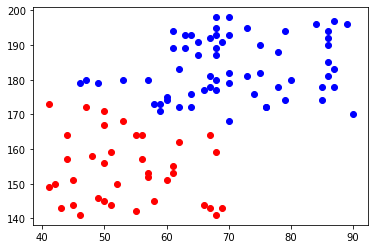

In [19]:
for g in group1:
    plt.plot(g[0], g[1], 'o', color='r')
for g in group2:
    plt.plot(g[0], g[1], 'o', color='b')